In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('experiment_20241204_230204/training_log.csv')

# convert Episode to int
df['Episode'] = pd.to_numeric(df['Episode'], errors='coerce')

# convert all other columns to float
float_columns = ['Train_Reward', 'Val_Reward', 'Epsilon', 'Learning_Rate']
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

rewards = pd.to_numeric(df['Train_Reward'])

max_reward = rewards.max()
print(f"Maximum reward: {max_reward}")

Maximum reward: 946.2999938502908


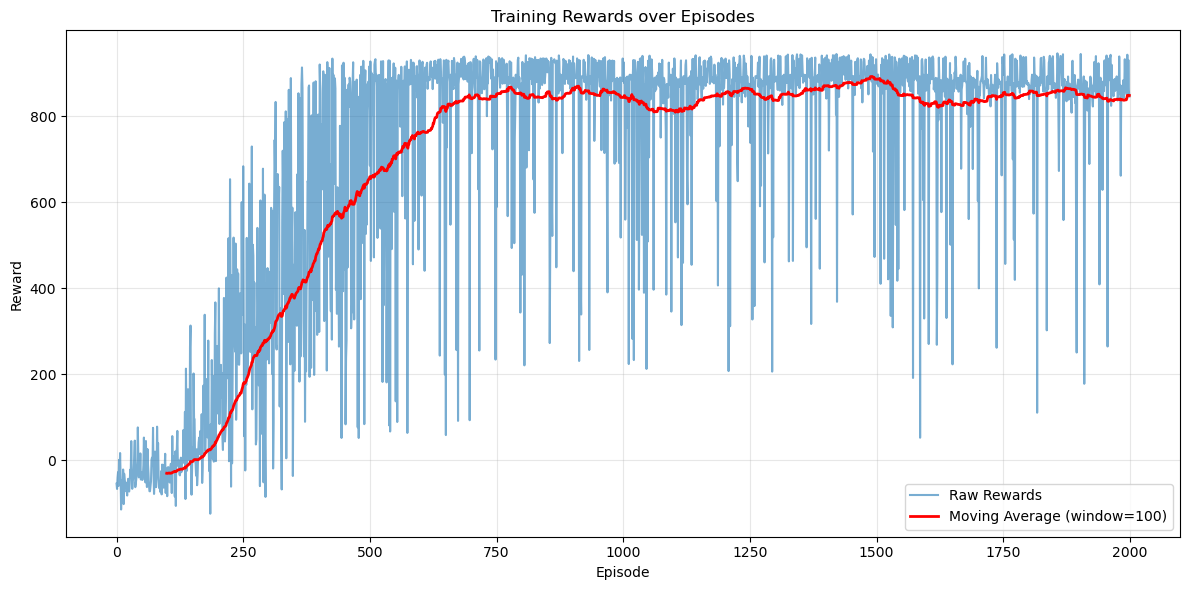

Initial Reward: -54.10
Final Reward: 845.85
Maximum Reward: 946.30
Average Reward: 704.44


In [3]:
# create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['Episode'], df['Train_Reward'], alpha=0.6, label='Raw Rewards')

# add a smoothed line using rolling average
window_size = 100
rolling_mean = df['Train_Reward'].rolling(window=window_size).mean()
plt.plot(df['Episode'], rolling_mean, 'r', linewidth=2, label=f'Moving Average (window={window_size})')

# customize the plot
plt.title('Training Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True, alpha=0.3)
plt.legend()

# show the plot
plt.tight_layout()
plt.show()

# print some statistics
print(f"Initial Reward: {df['Train_Reward'].iloc[0]:.2f}")
print(f"Final Reward: {df['Train_Reward'].iloc[-1]:.2f}")
print(f"Maximum Reward: {df['Train_Reward'].max():.2f}")
print(f"Average Reward: {df['Train_Reward'].mean():.2f}")

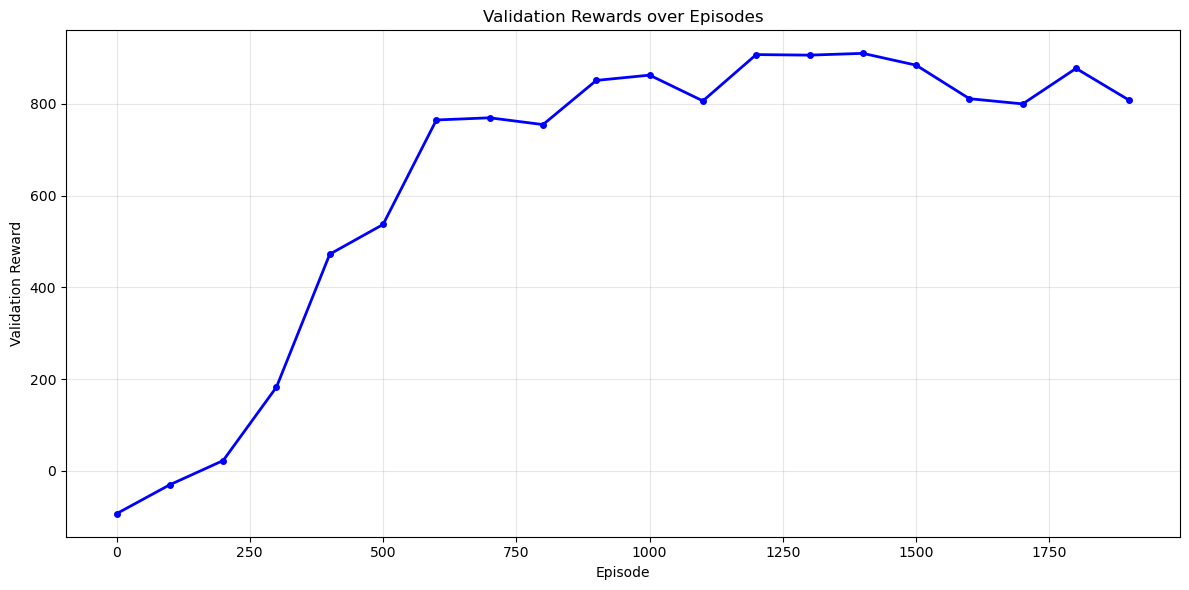

Initial Validation Reward: -93.40
Final Validation Reward: 807.82
Maximum Validation Reward: 910.23
Average Validation Reward: 640.31


In [4]:
# filter out rows where Val_Reward is not null
val_data = df[df['Val_Reward'].notna()]

plt.figure(figsize=(12, 6))
plt.plot(val_data['Episode'], val_data['Val_Reward'], 'b.-', linewidth=2, markersize=8)

plt.title('Validation Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Validation Reward')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Initial Validation Reward: {val_data['Val_Reward'].iloc[0]:.2f}")
print(f"Final Validation Reward: {val_data['Val_Reward'].iloc[-1]:.2f}")
print(f"Maximum Validation Reward: {val_data['Val_Reward'].max():.2f}")
print(f"Average Validation Reward: {val_data['Val_Reward'].mean():.2f}")

Dummy Model Statistics:
Mean Reward: -93.13
Std Dev: 0.49
Min: -94.30
Max: -91.30

Trained Model Statistics:
Mean Reward: 855.74
Std Dev: 141.07
Min: 181.90
Max: 940.50


/var/folders/yh/16tmwv6948d0jcwlqylyc9tc0000gn/T/ipykernel_56776/154845220.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dummy_rewards, trained_rewards], labels=['Dummy', 'Trained'])


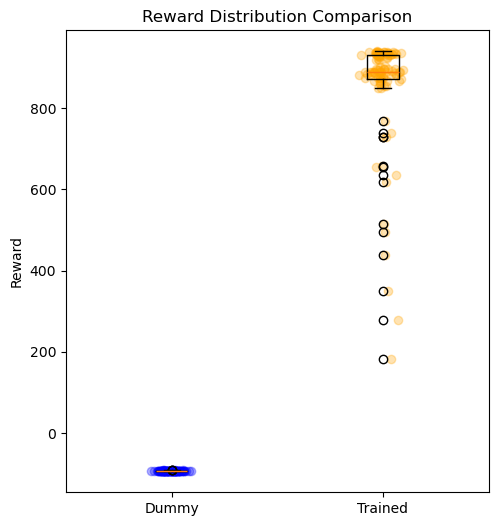

In [5]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
dummy_rewards = pd.read_csv('results_dummy_20241207_135353.csv')['reward']
trained_rewards = pd.read_csv('results_trained_20241207_141618.csv')['reward']

plt.boxplot([dummy_rewards, trained_rewards], labels=['Dummy', 'Trained'])
plt.title('Reward Distribution Comparison')
plt.ylabel('Reward')

x_dummy = np.random.normal(1, 0.04, size=len(dummy_rewards))
x_trained = np.random.normal(2, 0.04, size=len(trained_rewards))
plt.scatter(x_dummy, dummy_rewards, alpha=0.3, color='blue')
plt.scatter(x_trained, trained_rewards, alpha=0.3, color='orange')

print("Dummy Model Statistics:")
print(f"Mean Reward: {dummy_rewards.mean():.2f}")
print(f"Std Dev: {dummy_rewards.std():.2f}")
print(f"Min: {dummy_rewards.min():.2f}")
print(f"Max: {dummy_rewards.max():.2f}\n")

print("Trained Model Statistics:")
print(f"Mean Reward: {trained_rewards.mean():.2f}")
print(f"Std Dev: {trained_rewards.std():.2f}")
print(f"Min: {trained_rewards.min():.2f}")
print(f"Max: {trained_rewards.max():.2f}")

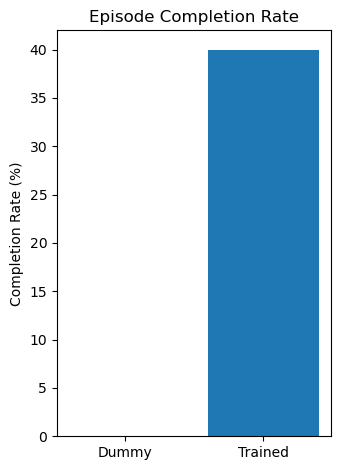


Completion Statistics:
Dummy Completion Rate: 0.0%
Trained Completion Rate: 40.0%

Average Steps for Trained (completed episodes): 683.0


In [6]:
plt.subplot(1, 2, 2)
dummy_steps = pd.read_csv('results_dummy_20241207_135353.csv')['steps']
trained_steps = pd.read_csv('results_trained_20241207_141618.csv')['steps']

# Calculate completion rates (episodes that didn't hit the 1000 step limit)
dummy_completion = (dummy_steps < 1000).mean() * 100
trained_completion = (trained_steps < 1000).mean() * 100

plt.bar(['Dummy', 'Trained'], [dummy_completion, trained_completion])
plt.title('Episode Completion Rate')
plt.ylabel('Completion Rate (%)')

plt.tight_layout()
plt.show()

print("\nCompletion Statistics:")
print(f"Dummy Completion Rate: {dummy_completion:.1f}%")
print(f"Trained Completion Rate: {trained_completion:.1f}%")
print(f"\nAverage Steps for Trained (completed episodes): {trained_steps[trained_steps < 1000].mean():.1f}")

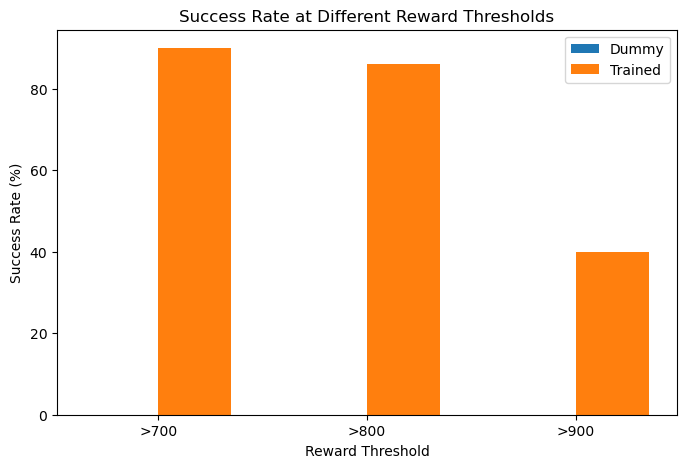

In [7]:
thresholds = [700, 800, 900]
dummy_success = [(dummy_rewards > threshold).mean() * 100 for threshold in thresholds]
trained_success = [(trained_rewards > threshold).mean() * 100 for threshold in thresholds]

plt.figure(figsize=(8, 5))
x = np.arange(len(thresholds))
width = 0.35

plt.bar(x - width/2, dummy_success, width, label='Dummy')
plt.bar(x + width/2, trained_success, width, label='Trained')
plt.xticks(x, [f'>{t}' for t in thresholds])
plt.title('Success Rate at Different Reward Thresholds')
plt.xlabel('Reward Threshold')
plt.ylabel('Success Rate (%)')
plt.legend()
plt.show()

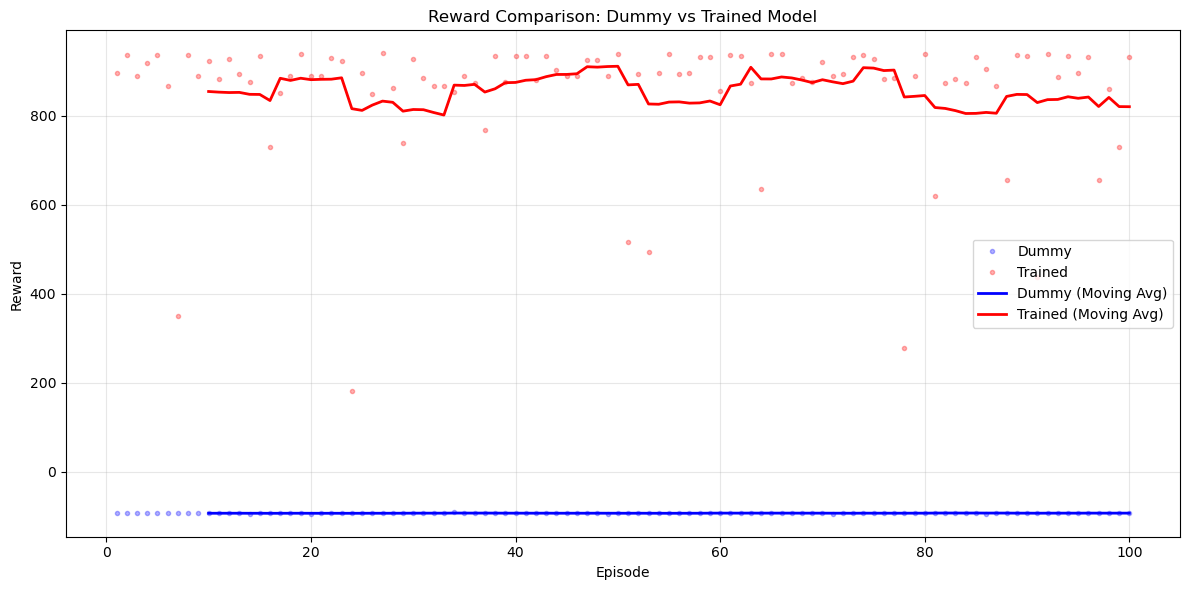

Dummy Model:
Average Reward: -93.13 ± 0.49
Min/Max Reward: -94.30 / -91.30

Trained Model:
Average Reward: 855.74 ± 141.07
Min/Max Reward: 181.90 / 940.50


In [9]:
dummy_rewards = pd.read_csv('results_dummy_20241207_135353.csv')['reward']
trained_rewards = pd.read_csv('results_trained_20241207_141618.csv')['reward']

plt.figure(figsize=(12, 6))

plt.plot(range(1, 101), dummy_rewards, 'b.', alpha=0.3, label='Dummy')
plt.plot(range(1, 101), trained_rewards, 'r.', alpha=0.3, label='Trained')

window_size = 10
dummy_smooth = dummy_rewards.rolling(window=window_size).mean()
trained_smooth = trained_rewards.rolling(window=window_size).mean()

plt.plot(range(1, 101), dummy_smooth, 'b-', linewidth=2, label='Dummy (Moving Avg)')
plt.plot(range(1, 101), trained_smooth, 'r-', linewidth=2, label='Trained (Moving Avg)')

plt.title('Reward Comparison: Dummy vs Trained Model')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("Dummy Model:")
print(f"Average Reward: {dummy_rewards.mean():.2f} ± {dummy_rewards.std():.2f}")
print(f"Min/Max Reward: {dummy_rewards.min():.2f} / {dummy_rewards.max():.2f}\n")

print("Trained Model:")
print(f"Average Reward: {trained_rewards.mean():.2f} ± {trained_rewards.std():.2f}")
print(f"Min/Max Reward: {trained_rewards.min():.2f} / {trained_rewards.max():.2f}")